<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Files" data-toc-modified-id="Files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Files</a></span><ul class="toc-item"><li><span><a href="#Carbon" data-toc-modified-id="Carbon-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Carbon</a></span></li><li><span><a href="#Oxygen-and-Sb" data-toc-modified-id="Oxygen-and-Sb-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Oxygen and Sb</a></span></li></ul></li><li><span><a href="#Plots" data-toc-modified-id="Plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Carbon" data-toc-modified-id="Carbon-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Carbon</a></span></li><li><span><a href="#O-and-Sb" data-toc-modified-id="O-and-Sb-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>O and Sb</a></span></li></ul></li></ul></div>

# Import

In [8]:
#This is excessive - I use a snippet with all of the imports loaded and # out the ones I don't need
#Snippets: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/snippets_menu/readme.html

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot
import matplotlib.ticker as ticker
from scipy.interpolate import interp1d
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.optimize
import math
from pylab import rcParams
from pandas import read_excel 
import openpyxl
import ipywidgets as widgets
from matplotlib.text import OffsetFrom
#from mpldatacursor import datacursor
#import mplcursors
import ipywidgets as widgets
from IPython.display import display
%matplotlib nbagg

matplotlib.rcParams['font.family'] = 'cambria' 
#rcParams['figure.figsize'] = 5, 3 (I don't use this)

#call variables

BE = 'Binding Energy (eV)'
RW = 'Raw'
BG = 'Baseline'
FT = 'Fit'

#define sub/superscripts

subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
print("C2H5OH".translate(subscript))
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
print("PIr2".translate(superscript).replace('PI', 'π'))


C₂H₅OH
πr²


# Files

In [6]:
#copy the desired folder as a pathname
plt.ion

file1 = r"C:\Users\jessi\OneDrive - Colostate\Research\XPS\SnSb 5-17-22\SnSb_051722.xlsx"
#file2 = '/Users/jessicagallawa/Library/CloudStorage/OneDrive-Colostate/Research/XPS/2022/031122KN_Sb_CNT_onCu/031122KN_Sb_onCu.xlsx'
#file3 = ''
#file4 = ''
#file5 = ''

## Carbon

In [10]:
#Carbon columns: file, sheet number, BE:envelope columns, rows to skip

#Right now I have it optimized to only do one at a time. 
#I'd eventually like to have it optimized to iterate over all files with set parameters into separate dataframes.

dl_C = [
    [file1, 1, "B:H", 3],
    #[file2, 1, "B:H", 3],
]


#column names (carbon names) edit CNS to include BE, RW, Carbons, BG, FT
CNS = [BE, RW, 
       'sp3 Carbon'.translate(superscript),
       'Carbonyl',
       'Singly-Oxygenated Carbon',
       
       BG, FT]

#### Making a dataframe of C ####

for num, param in enumerate(dl_C):
    df_C = pd.read_excel(param[0],
                       sheet_name=param[1], 
                       names=CNS,
                       index_col=BE,
                       usecols=param[2],
                       skiprows=param[3],
                      )
    df_C = df_C.dropna() #drop non numbers
    df_C_bg = df_C[BG] #copy background to new df
    df_C = df_C.drop(columns=BG) #remove background from df
    df_C = df_C.sub(df_C_bg, axis=0) #subtract background from dataframe
    
print(df_C)
df_C_alone = df_C.drop(columns=[RW,FT])
print(df_C_alone)

                     Raw  sp³ Carbon  Carbonyl  Singly-Oxygenated Carbon  Fit
Binding Energy (eV)                                                          
297.939              0.0         0.0       0.0                       0.0  0.0
297.839              0.0         0.0       0.0                       0.0  0.0
297.739              0.0         0.0       0.0                       0.0  0.0
297.639              0.0         0.0       0.0                       0.0  0.0
297.539              0.0         0.0       0.0                       0.0  0.0
...                  ...         ...       ...                       ...  ...
278.439              0.0         0.0       0.0                       0.0  0.0
278.339              0.0         0.0       0.0                       0.0  0.0
278.239              0.0         0.0       0.0                       0.0  0.0
278.139              0.0         0.0       0.0                       0.0  0.0
278.039              0.0         0.0       0.0                  

## Oxygen and Sb

In [51]:
#Sb and O columns: file, sheet number, BE:envelope columns, rows to skip
dl_O = [
    #[file1, 1, "O:X", 3],
    [file2, 1, "P:Y", 3],
    #[file2, 1, "B:J", 3],
]
ONS = [BE, RW, 
       'Sb2O3'.translate(subscript)+' 3d'+'5/2'.translate(superscript),
       'Sb2O3'.translate(subscript)+' 3d'+'3/2'.translate(superscript),
       'Sb 3d'+'5/2'.translate(superscript),
       'Sb 3d'+'3/2'.translate(superscript),
       'C-O',
       'Carbonyl',
       BG, FT]
print(ONS)

#### Making a dataframe of O ####

for num, param in enumerate(dl_O):
    df_O = pd.read_excel(param[0],
                         sheet_name=param[1], 
                         names=ONS,
                         index_col=BE,
                         usecols=param[2],
                         skiprows=param[3],
                        )
    df_O = df_O.dropna() #drop non numbers
    df_O_bg = df_O[BG] #copy background to new df
    df_O = df_O.drop(columns=BG) #remove background from df
    df_O = df_O.sub(df_O_bg, axis=0) #background subtraction
    print(df_O)

#Should have removed BG col and subtracted BG

['Binding Energy (eV)', 'Raw', 'Sb₂O₃ 3d⁵/²', 'Sb₂O₃ 3d³/²', 'Sb 3d⁵/²', 'Sb 3d³/²', 'C-O', 'Carbonyl', 'Baseline', 'Fit']
                     Raw  Sb₂O₃ 3d⁵/²  Sb₂O₃ 3d³/²  Sb 3d⁵/²  Sb 3d³/²  C-O  \
Binding Energy (eV)                                                           
550.0                0.0          0.0          0.0     0.000       0.0  0.0   
549.9                0.0          0.0          0.0     0.000       0.0  0.0   
549.8                0.0          0.0          0.0     0.000       0.0  0.0   
549.7                0.0          0.0          0.0     0.000       0.0  0.0   
549.6                0.0          0.0          0.0     0.000       0.0  0.0   
...                  ...          ...          ...       ...       ...  ...   
524.5                0.0          0.0          0.0     0.001       0.0  0.0   
524.4                0.0          0.0          0.0     0.000       0.0  0.0   
524.3                0.0          0.0          0.0     0.000       0.0  0.0   
524.2   

# Plots

## Carbon

<IPython.core.display.Javascript object>


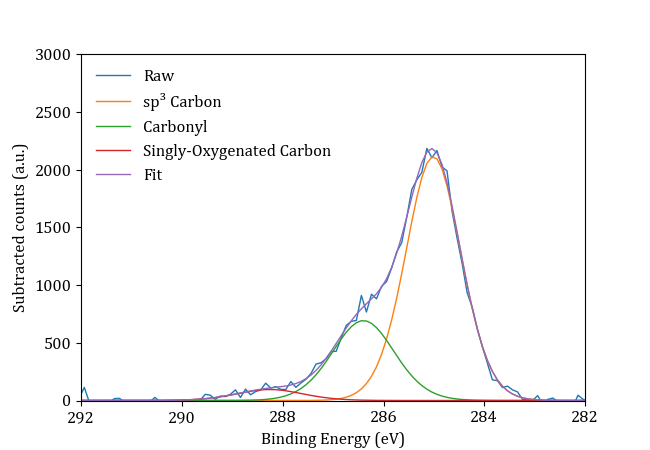

In [13]:
#What plots do you want? Add or # out what you'd like
# size, fontsize(axis labels), fontsize(tick labels, legend), file name, file type
    #This will will save the files to the notebook path!
plt.close()
plts = [
    [[6.5,4.5], 12, 12, 1, 1000, 'SbCu_Carbon_sm', 'png', 0.5],
    #[[13,7], 18, 16, 3, 600, 'SbCu_Carbon_lg', 'png', 1.5],
]

######You shouldn't have to edit the following######

plt.close()

for num,param in enumerate(plts):
    plt.rcParams["figure.figsize"] = param[0]
    plt.rcParams["ytick.labelsize"]= param[2]
    plt.rcParams["xtick.labelsize"]= param[2]
    plt.plot(df_C, linewidth = param[3],)
    plt.xlim(292,282)
    plt.ylim(0, 3000)
    plt.ylabel(r"Subtracted counts (a.u.)", fontsize=param[1])
    plt.xlabel(r"Binding Energy (eV)", fontsize=param[1])
    plt.legend(df_C, fontsize=param[2], frameon=False, loc='best')
    #plt.savefig(param[5], format=param[6], dpi=param[4], bbox_inches='tight')
    plt.ion()
    plt.show()
    #plt.close() ##the code gets finicky without this## 
                ##I don't know why it doesn't actually close but it works##


   sp³ Carbon  Carbonyl  Singly-Oxygenated Carbon       C-N
0     285.591   287.191                   288.291   286.491
1    8951.270  1233.311                   688.522  1870.847


<IPython.core.display.Javascript object>


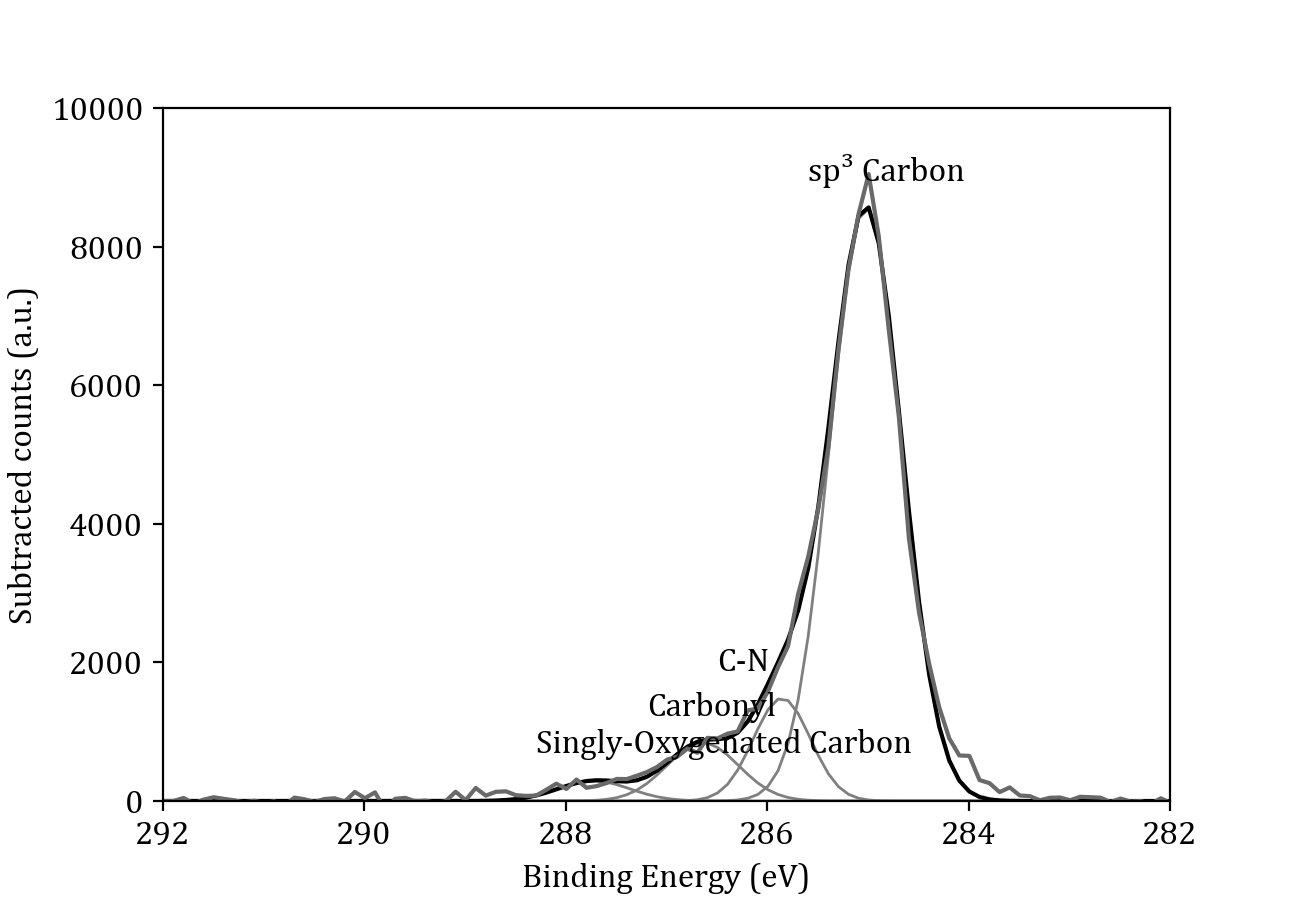

In [53]:
plts_grayscale = [
    [[6.5,4.5], 12, 12, 1, 1000, 'SbCuCNT_Carbon_sm_gs', 'png', 1.5],
    #[[13,7], 18, 16, 2, 600, 'SbCuCNT_Carbon_lg_gs', 'png', 3],
]
 #Finding Peaks
cs = df_C.drop(columns= [FT,RW])
px = cs.idxmax()
px = px.add(0.6)
py = cs.max()
py = py.add(400)
peaks_df_C = pd.DataFrame(data=[px, py])
print(peaks_df_C)

plt.close()
for num,param in enumerate(plts_grayscale):
    plt.rcParams["figure.figsize"] = param[0]
    plt.rcParams["ytick.labelsize"]= param[2]
    plt.rcParams["xtick.labelsize"]= param[2]
    plt.plot(df_C, linewidth = param[3], color = 'gray')
    plt.plot(df_C.index, df_C["Fit"], linewidth = param[7], color = 'black')
    plt.plot(df_C.index, df_C["Raw"], linewidth = param[7], color = 'dimgray')
    plt.xlim(292,282)
    plt.ylim(0, 10000)
    plt.ylabel(r"Subtracted counts (a.u.)", fontsize=param[1])
    plt.xlabel(r"Binding Energy (eV)", fontsize=param[1])
    #plt.legend(df_C, fontsize=param[2], frameon=False, loc='best')
    for (columnName, columnData) in peaks_df_C.iteritems():
        plt.annotate(columnName, xy= columnData,fontsize=param[2]).draggable()
        #try it, if it doesn't work just fix in PPT
    #plt.savefig(param[5], format=param[6], dpi=param[4], bbox_inches='tight')
    plt.show()
    #plt.close() ##the code gets finicky without this## 
                ##I don't know why it doesn't actually close but it works##

## O and Sb

<IPython.core.display.Javascript object>


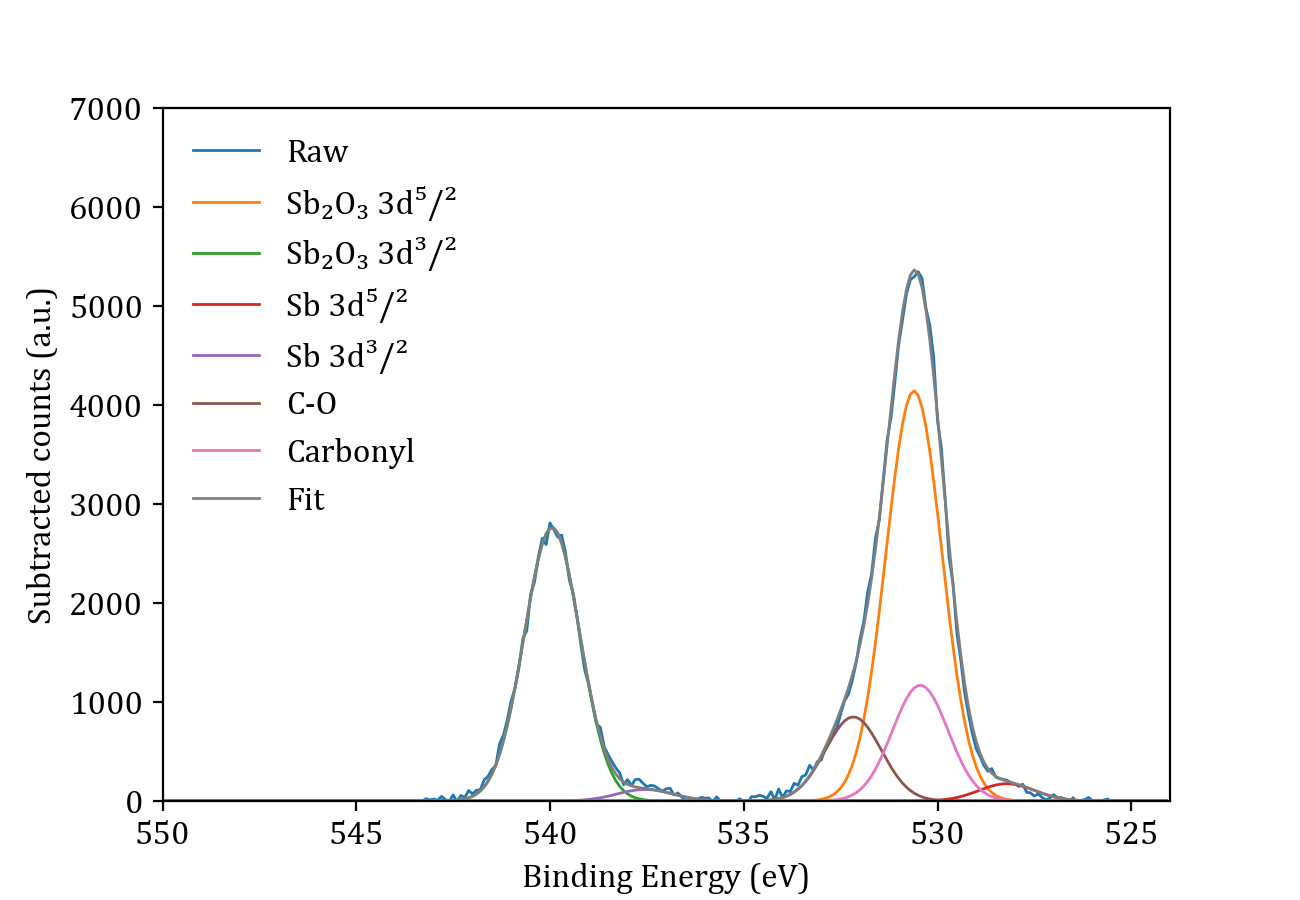

In [55]:
#What plots do you want? Add or # out what you'd like
# size, fontsize(axis labels), fontsize(tick labels, legend), file name, file type
    #This will will save the files to the notebook path!
plts = [
    [[6.5,4.5], 12, 12, 1, 1000, 'SbCu_SbandO_sm', 'png', 1.5],
    #[[13,7], 18, 16, 2, 600, 'SbCu_SbandO_lg', 'png', 3],
]

######You shouldn't have to edit the following######
plt.close()
for num,param in enumerate(plts):
    plt.rcParams["figure.figsize"] = param[0]
    plt.rcParams["ytick.labelsize"]= param[2]
    plt.rcParams["xtick.labelsize"]= param[2]
    plt.plot(df_O, linewidth = param[3])
    plt.xlim(550,524)
    plt.ylim(0, 7000)
    plt.ylabel(r"Subtracted counts (a.u.)", fontsize=param[1])
    plt.xlabel(r"Binding Energy (eV)", fontsize=param[1])
    plt.legend(df_O, fontsize=param[2], frameon=False,)

    #plt.savefig(param[5], format=param[6], dpi=param[4], bbox_inches='tight')
    plt.show()
    #plt.close() ##the code gets finicky without this## 
                ##I don't know why it doesn't actually close but it works##

<IPython.core.display.Javascript object>


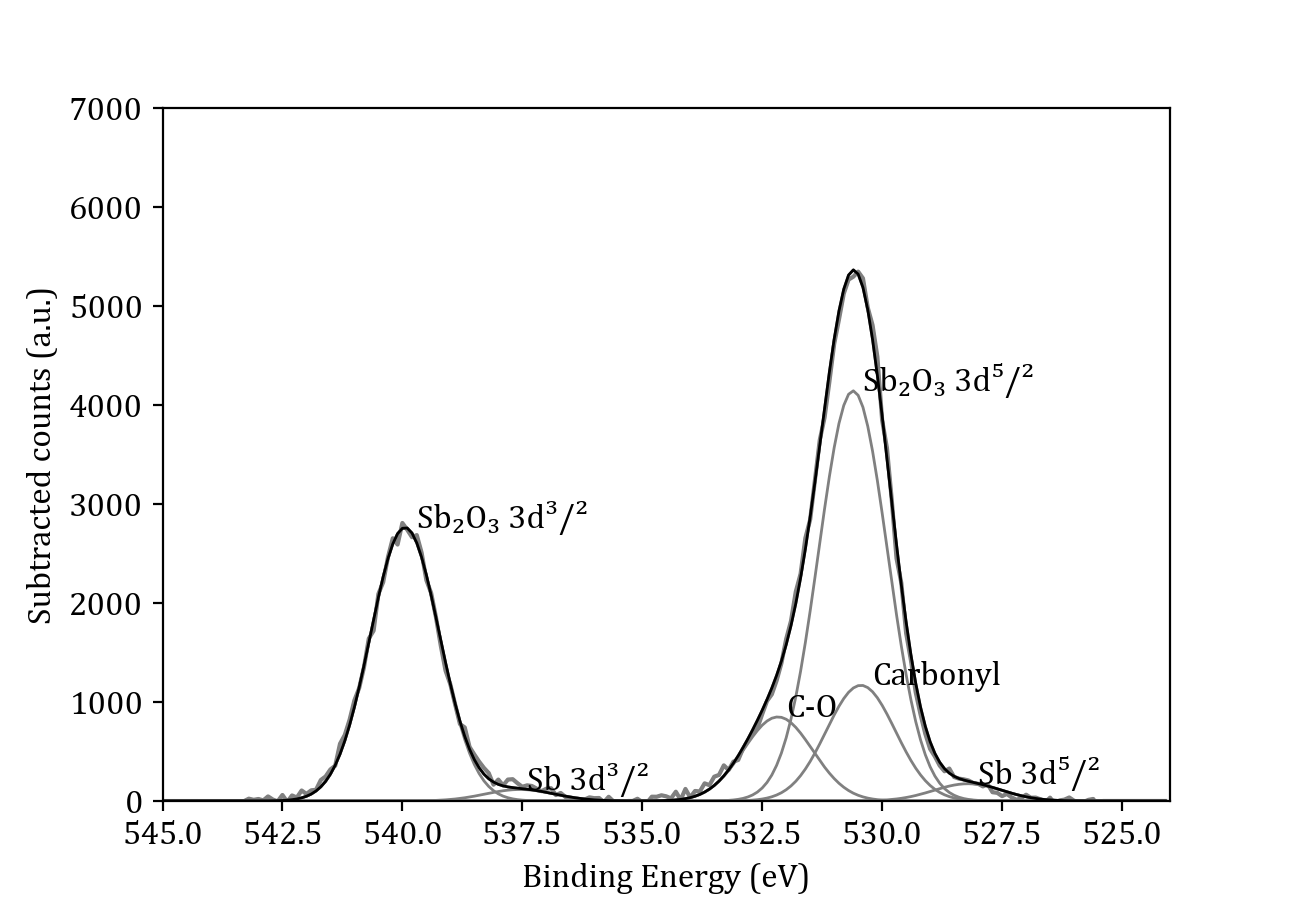

In [56]:
oxs = df_O.drop(columns= [FT,RW])
px = oxs.idxmax()
px = px.sub(0.2)
py = oxs.max()
#py = py.add(100)
peaks_df_O = pd.DataFrame(data=[px, py])
#print(peaks_df_O) #check if data is being pulled and subtracted correctly

plts_grayscale = [
    [[6.5,4.5], 12, 12, 1, 1000, 'SbCu_SbandO_sm_gs', 'png', 1.5],
    #[[13,7], 18, 16, 2, 600, 'SbCu_SbandO_lg_gs', 'png', 3],
]

plt.close()
for num,param in enumerate(plts_grayscale):
    plt.rcParams["figure.figsize"] = param[0]
    plt.rcParams["ytick.labelsize"]= param[2]
    plt.rcParams["xtick.labelsize"]= param[2]
    plt.plot(df_O, linewidth = param[3], color = 'gray')
    plt.plot(df_O.index, df_O["Raw"], linewidth = param[7], color = 'gray')
    
    plt.plot(df_O.index, df_O["Fit"], linewidth = param[3], color = 'black')
    plt.xlim(545,524)
    plt.ylim(0, 7000)
    plt.ylabel(r"Subtracted counts (a.u.)", fontsize=param[1])
    plt.xlabel(r"Binding Energy (eV)", fontsize=param[1])
    
    #defining labels: unhash for, plt rows to add peak labels
   
    #plt.legend(df_O, fontsize=param[2], frameon=False,)
    for (columnName, columnData) in peaks_df_O.iteritems():
        plt.annotate(columnName, xy= columnData,fontsize=param[2]).draggable()
        #try it, if it doesn't work just fix in PPT!
    
    #plt.savefig(param[5], format=param[6], dpi=param[4], bbox_inches='tight')
    plt.show()
    #plt.close() ##the code gets finicky without this## 
                ##I don't know why it doesn't actually close but it works##


In [3]:
jupyter_contrib_nbextensions



SyntaxError: invalid syntax (1391804087.py, line 1)